In [1156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## Smoke Detection Dataset

In [1157]:
data = pd.read_csv('smoke_detection_iot.csv', sep=',')

* **UTC**: Time when experiment was performed
* **Temperature[C]**: Temperature of surroundings, measured in celcius
* **Humidity[%]**: Air humidity during the experiment
* **TVOC[ppb]**: Total Volatile Organic Compounds, measured in ppb (parts per billion)
* **eCO2[ppm]**: CO2 equivalent concentration, measured in ppm (parts per million)
* **Raw H2**: The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings
* **Raw Ethanol**: The amount of Raw Ethanol present in surroundings
* **Pressure[hPa]**: Air pressure, Measured in hPa
* **PM1.0**: Paticulate matter of diameter less than 1.0 micrometer 
* **PM2.5**: Paticulate matter of diameter less than 2.5 micrometer
* **NC0.5**: Concentration of particulate matter of diameter less than 0.5 micrometer
* **NC1.0**: Concentration of particulate matter of diameter less than 1.0 micrometer
* **NC2.5**: Concentration of particulate matter of diameter less than 2.5 micrometer
* **CNT**: Sample Count. Fire alarm(Reality) If fire was present then value is 1 else it is 0 
* **Fire alarm**: 1 means Positive and 0 means Not Positive

In [1158]:
data

,id,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [1159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Text(0.5, 1.0, 'Should the fire alarm go off')

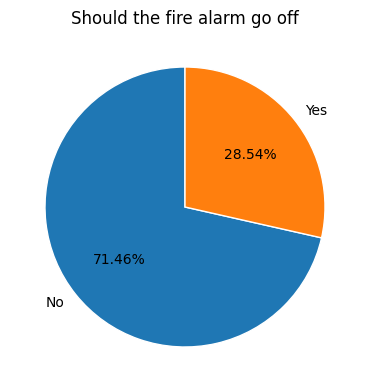

In [1160]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.pie(data['Fire Alarm'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%', wedgeprops=dict(width=1, edgecolor='w', linewidth=1), startangle=90)
plt.title('Should the fire alarm go off')

In [1161]:
data.describe()

,id,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [1162]:
target_column = ['Fire Alarm']
predictors = list(set(list(data.columns)) - set(target_column) - set(['id']))

In [1163]:
for column_name in data.columns:
    if data[column_name].dtype != 'float64' and data[column_name].dtype != 'int64':
        print('Wrong data type in column:', column_name)


if data.isna().any().any():
    print('There are missing values in the dataset:')
    print(data.isna().sum())
else:
    print('There are no missing values in the dataset.')

There are no missing values in the dataset.


## Deleting wrong data (outliers)

We're removing the outliers from our database\
using z-score (a degree of deviation from the mean)\
Formula : **_z = (x - mean)/std_**

In [1164]:
standard_deviations = 3

data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]

,id,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55974,55974,1654717019,45.030,27.01,12419,400,12958,19219,936.843,10.14,10.54,69.79,10.883,0.246,4832,0
55975,55975,1654717020,45.080,27.05,13556,400,12914,19148,936.849,17.08,17.75,117.57,18.334,0.414,4833,0
55976,55976,1654717021,45.140,27.47,14355,400,12891,19093,936.842,26.20,27.22,180.35,28.123,0.635,4834,0
55977,55977,1654717022,45.220,27.62,16640,400,12861,19039,936.850,24.38,25.33,167.81,26.168,0.591,4835,0


Setting up variables for predictors and target column

In [1165]:
print("Predictors present in the dataset:\n")
print(predictors)
print("\nTarget column:", target_column)

dataPredictors = data[predictors].values
dataTarget = data[target_column].values

Predictors present in the dataset:

['Humidity[%]', 'Pressure[hPa]', 'NC1.0', 'UTC', 'PM1.0', 'CNT', 'eCO2[ppm]', 'NC0.5', 'Temperature[C]', 'TVOC[ppb]', 'Raw Ethanol', 'Raw H2', 'NC2.5', 'PM2.5']

Target column: ['Fire Alarm']


## Database preprocessing

We will divide the database into two versions - one less processed and the other more processed

To process the data we will use min-max scaler

In [1166]:
less_processed_data = data.copy()
more_processed_data = data.copy()

min_max_scaler = MinMaxScaler()

more_processed_data[predictors] = min_max_scaler.fit_transform(more_processed_data[predictors])

Dividing data into testing and training data

In [1167]:
lp_predictors_train, lp_predictors_test, lp_target_train, lp_target_test = train_test_split(less_processed_data[predictors], less_processed_data[target_column], test_size=0.3, random_state=269226)
mp_predictors_train, mp_predictors_test, mp_target_train, mp_target_test = train_test_split(more_processed_data[predictors], more_processed_data[target_column], test_size=0.3, random_state=269226)

## Decision Tree

In [1168]:
lp_decision_tree_smaller = DecisionTreeClassifier(max_depth=3)
lp_decision_tree_bigger = DecisionTreeClassifier()

mp_decision_tree_smaller = DecisionTreeClassifier(max_depth=3)
mp_decision_tree_bigger = DecisionTreeClassifier()

Decision tree for less processed data

In [1169]:
lp_decision_tree_smaller.fit(lp_predictors_train, lp_target_train)
lp_decision_tree_bigger.fit(lp_predictors_train, lp_target_train)

lp_decision_tree_smaller_predicted = lp_decision_tree_smaller.predict(lp_predictors_test)
lp_decision_tree_bigger_predicted = lp_decision_tree_bigger.predict(lp_predictors_test)

print("Less processed data smaller decision tree depth accuracy:", accuracy_score(lp_target_test, lp_decision_tree_smaller_predicted))
print("Less processed data bigger decision tree depth accuracy:", accuracy_score(lp_target_test, lp_decision_tree_bigger_predicted))

Less processed data smaller decision tree depth accuracy: 0.9739741338016925
Less processed data bigger decision tree depth accuracy: 1.0


In [1170]:
lp_smaller_confusion_matrix = confusion_matrix(lp_target_test, lp_decision_tree_smaller_predicted)
lp_bigger_confusion_matrix = confusion_matrix(lp_target_test, lp_decision_tree_bigger_predicted)

Smaller max depth of the decision tree:


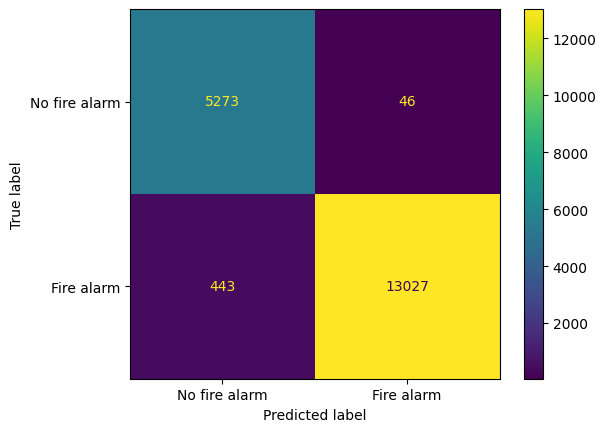

In [1171]:
print("Smaller max depth of the decision tree:")

lp_smaller_confusion_matrix_display = ConfusionMatrixDisplay(lp_smaller_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_smaller_confusion_matrix_display.plot()

Bigger max depth of the decision tree:


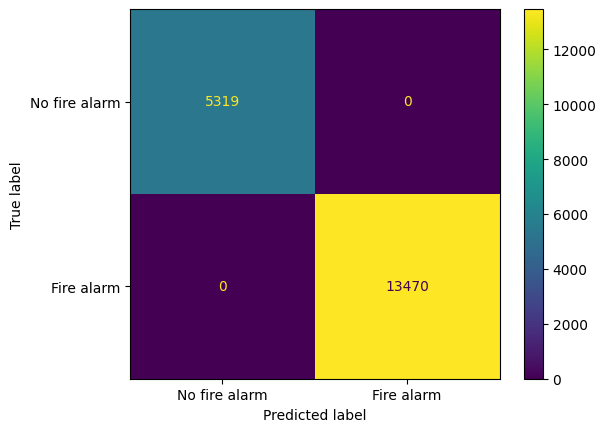

In [1172]:
print("Bigger max depth of the decision tree:")

lp_bigger_confusion_matrix_display = ConfusionMatrixDisplay(lp_bigger_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_bigger_confusion_matrix_display.plot()

Decision tree for more processed data

In [1173]:
mp_decision_tree_smaller.fit(mp_predictors_train, mp_target_train)
mp_decision_tree_bigger.fit(mp_predictors_train, mp_target_train)

mp_decision_tree_smaller_predicted = mp_decision_tree_smaller.predict(mp_predictors_test)
mp_decision_tree_bigger_predicted = mp_decision_tree_bigger.predict(mp_predictors_test)

print("More processed data smaller decision tree depth accuracy:", accuracy_score(mp_target_test, mp_decision_tree_smaller_predicted))
print("More processed data bigger decision tree depth accuracy:", accuracy_score(mp_target_test, mp_decision_tree_bigger_predicted))

More processed data smaller decision tree depth accuracy: 0.9739741338016925
More processed data bigger decision tree depth accuracy: 0.9998935547394753


In [1174]:
mp_decision_tree_smaller_confusion_matrix = confusion_matrix(mp_target_test, mp_decision_tree_smaller_predicted)
mp_decision_tree_bigger_confusion_matrix = confusion_matrix(mp_target_test, mp_decision_tree_bigger_predicted)

Smaller max depth of the decision tree:


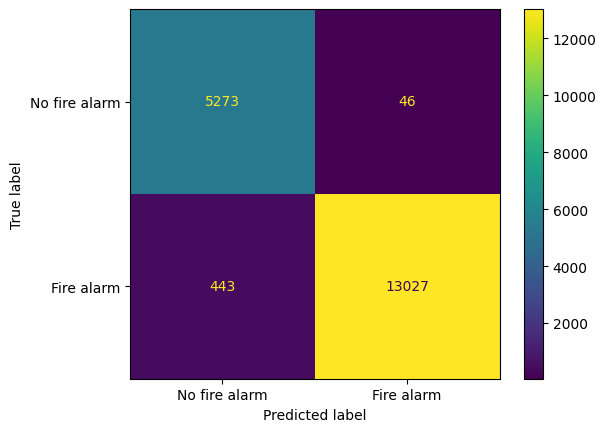

In [1175]:
print("Smaller max depth of the decision tree:")

mp_decision_tree_smaller_confusion_matrix_display = ConfusionMatrixDisplay(mp_decision_tree_smaller_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_decision_tree_smaller_confusion_matrix_display.plot()

Bigger max depth of the decision tree:


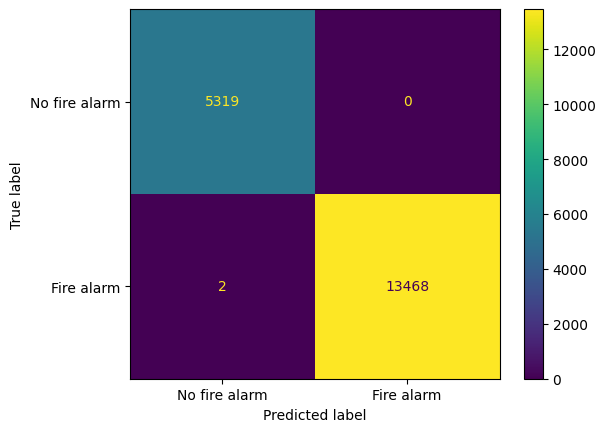

In [1176]:
print("Bigger max depth of the decision tree:")

mp_decision_tree_bigger_confusion_matrix_display = ConfusionMatrixDisplay(mp_decision_tree_bigger_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_decision_tree_bigger_confusion_matrix_display.plot()

## Naive-Bayes

Naive-bayes for less processed data

In [1177]:
lp_gaussian_nb = GaussianNB()
lp_gaussian_predicted = lp_gaussian_nb.fit(lp_predictors_train, lp_target_train).predict(lp_predictors_test)

print("Less processed data Gaussian Naive Bayes accuracy:", accuracy_score(lp_target_test, lp_gaussian_predicted))

Less processed data Gaussian Naive Bayes accuracy: 0.8244717653946458


C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


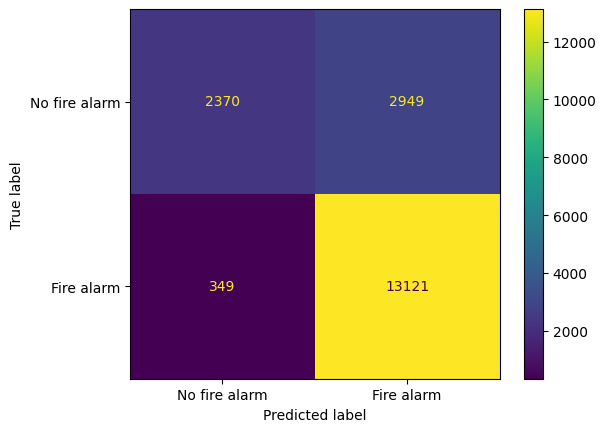

In [1178]:
lp_gaussian_confusion_matrix = confusion_matrix(lp_target_test, lp_gaussian_predicted)
lp_gaussian_confusion_matrix_display = ConfusionMatrixDisplay(lp_gaussian_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_gaussian_confusion_matrix_display.plot()

Naive bayes for more processed data

In [1179]:
mp_gaussian_nb = GaussianNB()
mp_gaussian_predicted = mp_gaussian_nb.fit(mp_predictors_train, mp_target_train).predict(mp_predictors_test)

print("More processed data Gaussian Naive Bayes accuracy:", accuracy_score(mp_target_test, mp_gaussian_predicted))

More processed data Gaussian Naive Bayes accuracy: 0.8287827984458992


C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


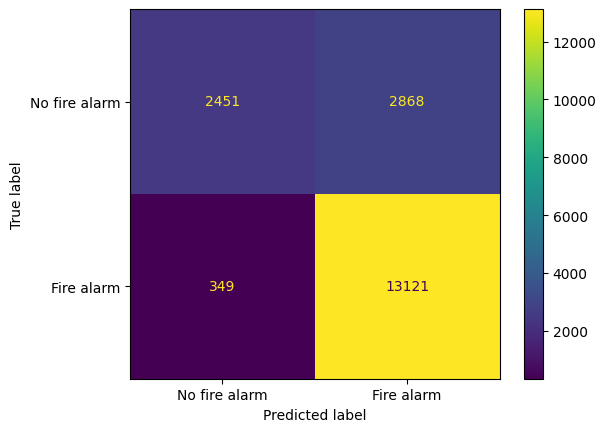

In [1180]:
mp_gaussian_confusion_matrix = confusion_matrix(mp_target_test, mp_gaussian_predicted)
mp_gaussian_confusion_matrix_display = ConfusionMatrixDisplay(mp_gaussian_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_gaussian_confusion_matrix_display.plot()

## K-nearest neighbours

K-nearest neighbours for less processed data (k = 3)

In [1181]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
lp_knn_predicted = knn.fit(lp_predictors_train, lp_target_train).predict(lp_predictors_test)

print("Less processed data KNN accuracy:", accuracy_score(lp_target_test, lp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Less processed data KNN accuracy: 0.9998403321092129


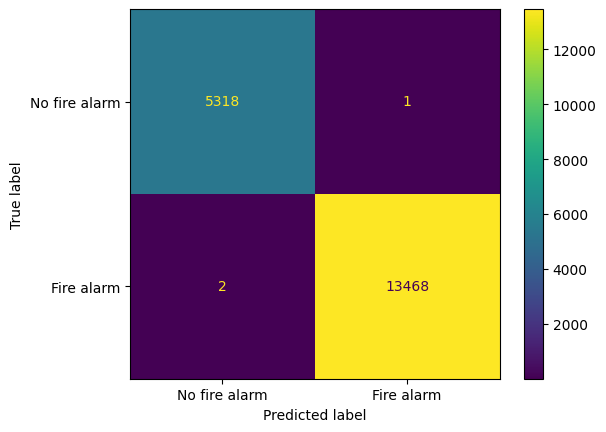

In [1182]:
lp_knn_confusion_matrix = confusion_matrix(lp_target_test, lp_knn_predicted)
lp_knn_confusion_matrix_display = ConfusionMatrixDisplay(lp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_knn_confusion_matrix_display.plot()

K-nearest neighbours for more processed data (k = 3)

In [1183]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
mp_knn_predicted = knn.fit(mp_predictors_train, mp_target_train).predict(mp_predictors_test)

print("More processed data KNN accuracy:", accuracy_score(mp_target_test, mp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


More processed data KNN accuracy: 0.9998935547394753


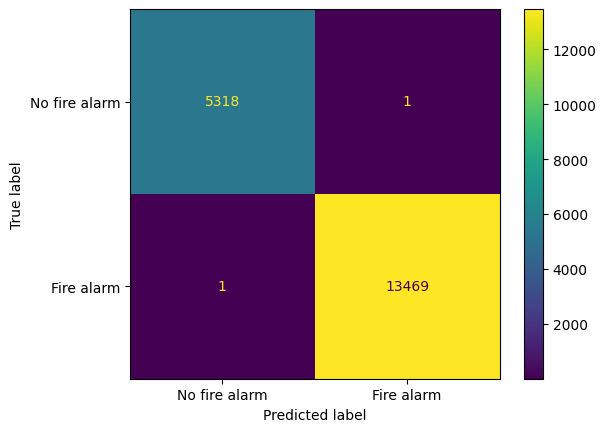

In [1184]:
mp_knn_confusion_matrix = confusion_matrix(mp_target_test, mp_knn_predicted)
mp_knn_confusion_matrix_display = ConfusionMatrixDisplay(mp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_knn_confusion_matrix_display.plot()

K-nearest neighbours for less processed data (k = 7)

In [1185]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
lp_knn_predicted = knn.fit(lp_predictors_train, lp_target_train).predict(lp_predictors_test)

print("Less processed data KNN accuracy:", accuracy_score(lp_target_test, lp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Less processed data KNN accuracy: 0.9998403321092129


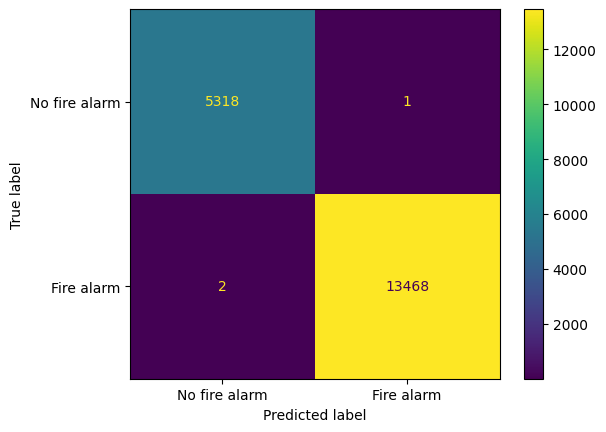

In [1186]:
lp_knn_confusion_matrix = confusion_matrix(lp_target_test, lp_knn_predicted)
lp_knn_confusion_matrix_display = ConfusionMatrixDisplay(lp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_knn_confusion_matrix_display.plot()

K-nearest neighbours for more processed data (k = 7)

In [1187]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
mp_knn_predicted = knn.fit(mp_predictors_train, mp_target_train).predict(mp_predictors_test)

print("More processed data KNN accuracy:", accuracy_score(mp_target_test, mp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


More processed data KNN accuracy: 0.9996806642184257


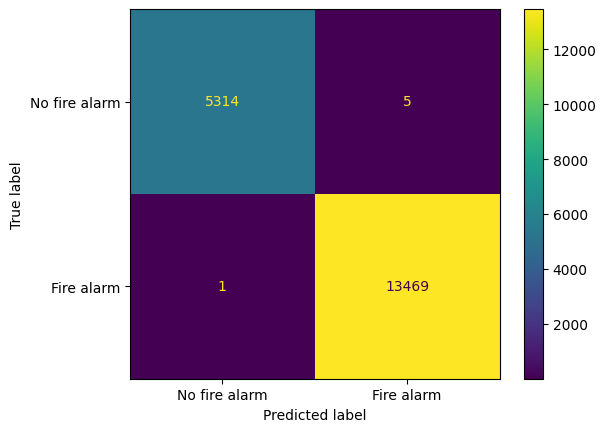

In [1188]:
mp_knn_confusion_matrix = confusion_matrix(mp_target_test, mp_knn_predicted)
mp_knn_confusion_matrix_display = ConfusionMatrixDisplay(mp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_knn_confusion_matrix_display.plot()

K-nearest neighbours for less processed data (k = 11)

In [1189]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
lp_knn_predicted = knn.fit(lp_predictors_train, lp_target_train).predict(lp_predictors_test)

print("Less processed data KNN accuracy:", accuracy_score(lp_target_test, lp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Less processed data KNN accuracy: 0.9998403321092129


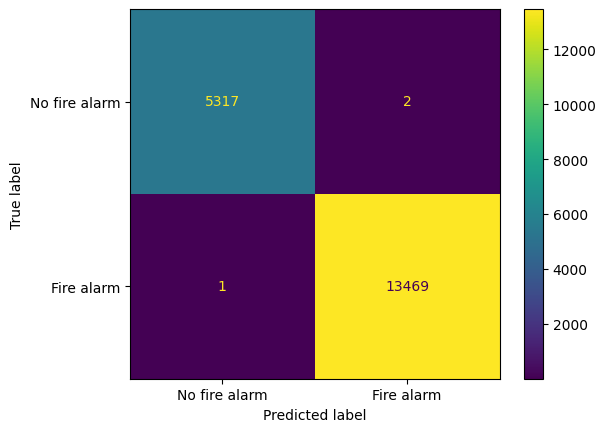

In [1190]:
lp_knn_confusion_matrix = confusion_matrix(lp_target_test, lp_knn_predicted)
lp_knn_confusion_matrix_display = ConfusionMatrixDisplay(lp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_knn_confusion_matrix_display.plot()

K-nearest neighbours for more processed data (k = 11)

In [1191]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
mp_knn_predicted = knn.fit(mp_predictors_train, mp_target_train).predict(mp_predictors_test)

print("More processed data KNN accuracy:", accuracy_score(mp_target_test, mp_knn_predicted))

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


More processed data KNN accuracy: 0.9996274415881633


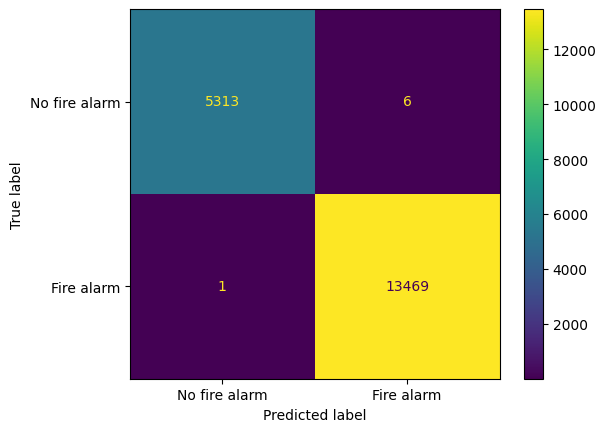

In [1192]:
mp_knn_confusion_matrix = confusion_matrix(mp_target_test, mp_knn_predicted)
mp_knn_confusion_matrix_display = ConfusionMatrixDisplay(mp_knn_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_knn_confusion_matrix_display.plot()

## Neuron network

Neuron networks for less processed database:
* neural structure => 10, 10, 10,
* activation => relu,
* solver => adam 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Less processed data MLP accuracy: 0.7169088296343605


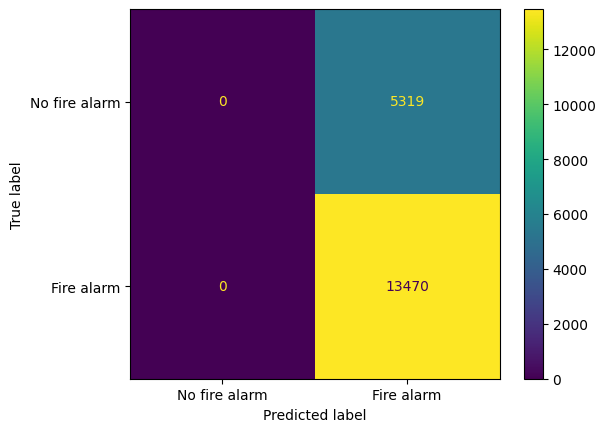

In [1193]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='relu', solver='adam', random_state=269226)

mlp.fit(lp_predictors_train, lp_target_train)

lp_mlp_predicted = mlp.predict(lp_predictors_test)

print("Less processed data MLP accuracy:", accuracy_score(lp_mlp_predicted, lp_target_test))

lp_mlp_confusion_matrix = confusion_matrix(lp_target_test, lp_mlp_predicted)
lp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(lp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_mlp_confusion_matrix_display.plot()

Neuron networks for more processed database:
* neural structure => 10, 10, 10,
* activation => relu,
* solver => adam 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


More processed data MLP accuracy: 0.9999467773697376


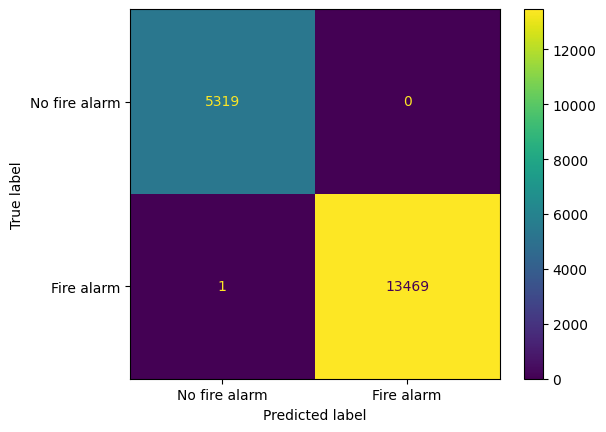

In [1194]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='relu', solver='adam', random_state=269226)

mlp.fit(mp_predictors_train, mp_target_train)

mp_mlp_predicted = mlp.predict(mp_predictors_test)

print("More processed data MLP accuracy:", accuracy_score(mp_mlp_predicted, mp_target_test))

mp_mlp_confusion_matrix = confusion_matrix(mp_target_test, mp_mlp_predicted)
mp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(mp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_mlp_confusion_matrix_display.plot()

Neuron networks for less processed database:
* neural structure => 10, 5, 3,
* activation => tanh,
* solver => sgd 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Less processed data MLP accuracy: 0.7169088296343605


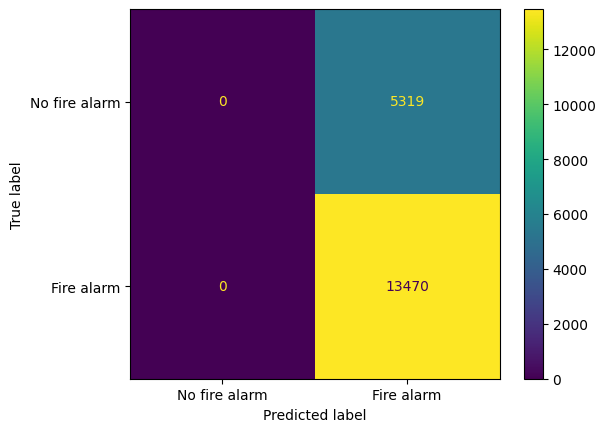

In [1195]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000, activation='tanh', solver='sgd', random_state=269226)

mlp.fit(lp_predictors_train, lp_target_train)

lp_mlp_predicted = mlp.predict(lp_predictors_test)

print("Less processed data MLP accuracy:", accuracy_score(lp_mlp_predicted, lp_target_test))

lp_mlp_confusion_matrix = confusion_matrix(lp_target_test, lp_mlp_predicted)
lp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(lp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_mlp_confusion_matrix_display.plot()

Neuron networks for more processed database:
* neural structure => 10, 5, 3,
* activation => tanh,
* solver => sgd 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


More processed data MLP accuracy: 0.9993613284368513


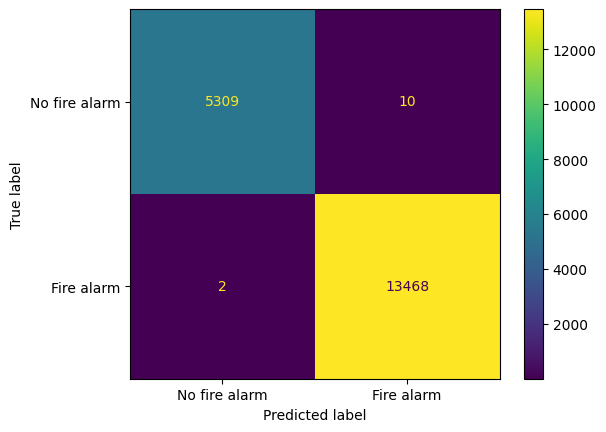

In [1196]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000, activation='tanh', solver='sgd', random_state=269226)

mlp.fit(mp_predictors_train, mp_target_train)

mp_mlp_predicted = mlp.predict(mp_predictors_test)

print("More processed data MLP accuracy:", accuracy_score(mp_mlp_predicted, mp_target_test))

mp_mlp_confusion_matrix = confusion_matrix(mp_target_test, mp_mlp_predicted)
mp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(mp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_mlp_confusion_matrix_display.plot()

Neuron networks for less processed database:
* neural structure => 15, 15, 10, 5,
* activation => logistic,
* solver => adam 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Less processed data MLP accuracy: 0.7169088296343605


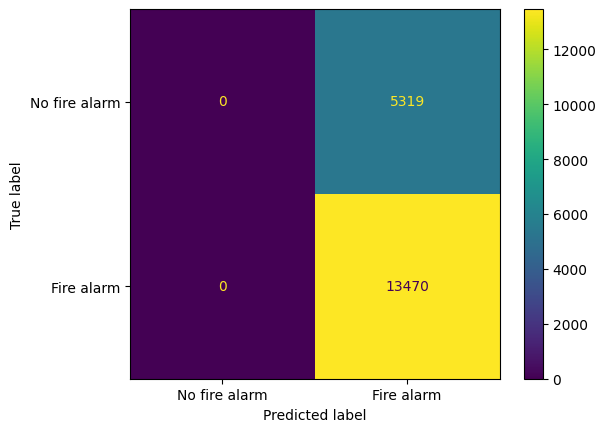

In [1197]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 15, 10, 5), max_iter=1000, activation='logistic', solver='adam', random_state=269226)

mlp.fit(lp_predictors_train, lp_target_train)

lp_mlp_predicted = mlp.predict(lp_predictors_test)

print("Less processed data MLP accuracy:", accuracy_score(lp_mlp_predicted, lp_target_test))

lp_mlp_confusion_matrix = confusion_matrix(lp_target_test, lp_mlp_predicted)
lp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(lp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_mlp_confusion_matrix_display.plot()

Neuron networks for more processed database:
* neural structure => 15, 15, 10, 5
* activation => logistic,
* solver => adam 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


More processed data MLP accuracy: 0.9838203204002341


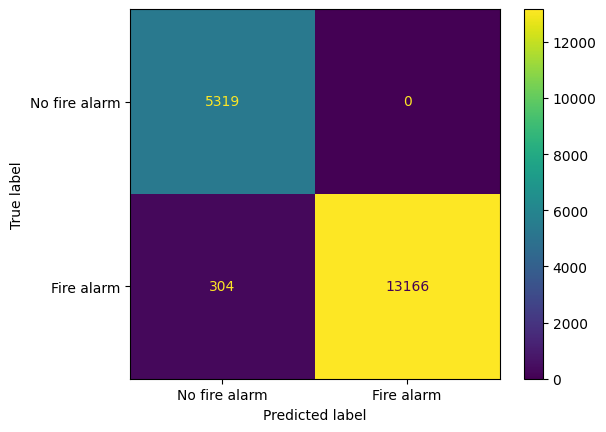

In [1198]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 15, 10, 5), max_iter=1000, activation='logistic', solver='adam', random_state=269226)

mlp.fit(mp_predictors_train, mp_target_train)

mp_mlp_predicted = mlp.predict(mp_predictors_test)

print("More processed data MLP accuracy:", accuracy_score(mp_mlp_predicted, mp_target_test))

mp_mlp_confusion_matrix = confusion_matrix(mp_target_test, mp_mlp_predicted)
mp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(mp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_mlp_confusion_matrix_display.plot()

Neuron networks for less processed database:
* neural structure => 10, 10, 10,
* activation => logistic,
* solver => lbfgs 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Less processed data MLP accuracy: 0.7169088296343605


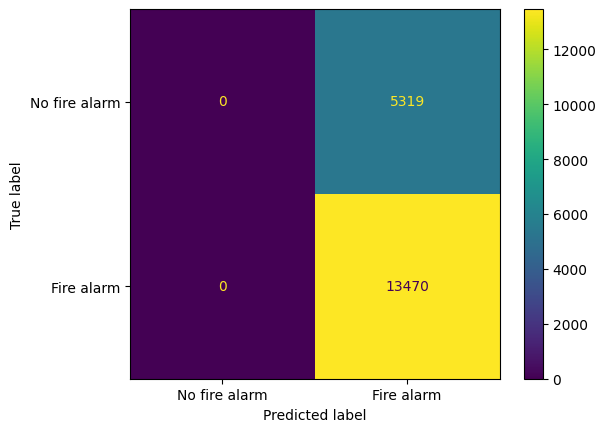

In [1199]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='logistic', solver='lbfgs')

mlp.fit(lp_predictors_train, lp_target_train)

lp_mlp_predicted = mlp.predict(lp_predictors_test)

print("Less processed data MLP accuracy:", accuracy_score(lp_mlp_predicted, lp_target_test))

lp_mlp_confusion_matrix = confusion_matrix(lp_target_test, lp_mlp_predicted)
lp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(lp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
lp_mlp_confusion_matrix_display.plot()

Neuron networks for more processed database:
* neural structure => 10, 10, 10,
* activation => logistic,
* solver => lbfgs 

C:\Users\Bartek\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


More processed data MLP accuracy: 0.9996806642184257


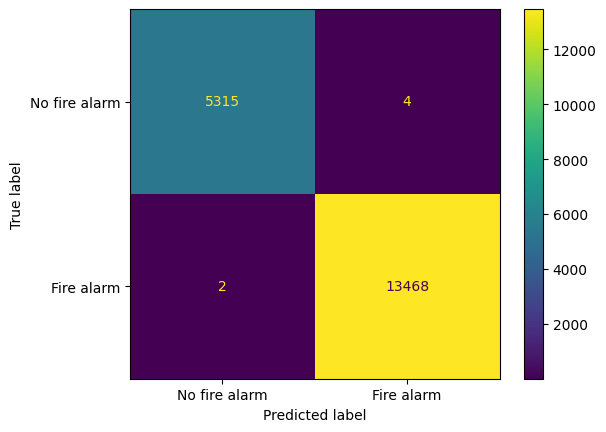

In [1200]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='logistic', solver='lbfgs')

mlp.fit(mp_predictors_train, mp_target_train)

mp_mlp_predicted = mlp.predict(mp_predictors_test)

print("More processed data MLP accuracy:", accuracy_score(mp_mlp_predicted, mp_target_test))

mp_mlp_confusion_matrix = confusion_matrix(mp_target_test, mp_mlp_predicted)
mp_mlp_confusion_matrix_display = ConfusionMatrixDisplay(mp_mlp_confusion_matrix, display_labels=['No fire alarm', 'Fire alarm'])
mp_mlp_confusion_matrix_display.plot()